# DATASET IN CONSUMER FINANCIAL PROTECTION BUREAU

This dataset contains information about Consumer Complaints on https://data.world/cfpb/consumer-complaints This data is about Date received, Product, Sub-product, Issue, Company, State.

## Loading the dataset: Load the data and import the libraries.

In [15]:
#importing Required library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#importing plotly Library

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)  
cf.go_offline()

In [18]:
#importing the datase 
#See the all data

df=pd.read_csv(r"/content/drive/MyDrive/CSV Files/complaintdata.csv")

In [ ]:
df

Date received  ... Complaint ID
0          08/09/2015  ...      1509954
1          12/23/2019  ...      3475943
2          01/29/2019  ...      3136759
3          08/19/2015  ...      1527601
4          03/04/2016  ...      1816726
...               ...  ...          ...
1471761    01/29/2016  ...      1765368
1471762    11/27/2019  ...      3452575
1471763    05/07/2019  ...      3235219
1471764    07/18/2019  ...      3311105
1471765    11/13/2019  ...      3437084

[1471766 rows x 18 columns]

## Data Cleaning, Renaming the columns, Dropping duplicates, Cleaning individual columns, Remove the NaN values from the dataset

In [ ]:
df.shape

(1471766, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471766 entries, 0 to 1471765
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1471766 non-null  object
 1   Product                       1471766 non-null  object
 2   Sub-product                   1236601 non-null  object
 3   Issue                         1471766 non-null  object
 4   Sub-issue                     916763 non-null   object
 5   Consumer complaint narrative  481087 non-null   object
 6   Company public response       548101 non-null   object
 7   Company                       1471766 non-null  object
 8   State                         1447286 non-null  object
 9   ZIP code                      1334581 non-null  object
 10  Tags                          200565 non-null   object
 11  Consumer consent provided?    862588 non-null   object
 12  Submitted via                 1471766 non-

In [19]:
#Changing the column names
#Reading Column Names

df = df.rename(columns={'Consumer consent provided?':'ccp','Consumer complaint narrative':'ccn',
                                  'Company response to consumer':'crc','Consumer disputed?':'Consumer disputed','Company public response':'cpr'})
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'ccn',
       'cpr', 'Company', 'State', 'ZIP code', 'Tags', 'ccp', 'Submitted via',
       'Date sent to company', 'crc', 'Timely response?', 'Consumer disputed',
       'Complaint ID'],
      dtype='object')

In [20]:
#Deleted the columns ZIP code, Complaint ID and Submitted via as they were not important for analysis
del df["ZIP code"]
del df["Complaint ID"]
del df["Submitted via"]

In [ ]:
df.duplicated().sum()

57819

In [ ]:
df.isnull().sum()

Date received                 0
Product                       0
Sub-product              235165
Issue                         0
Sub-issue                555003
ccn                      990679
cpr                      923665
Company                       0
State                     24480
Tags                    1271201
ccp                      609178
Date sent to company          0
crc                           1
Timely response?              0
Consumer disputed        703286
dtype: int64

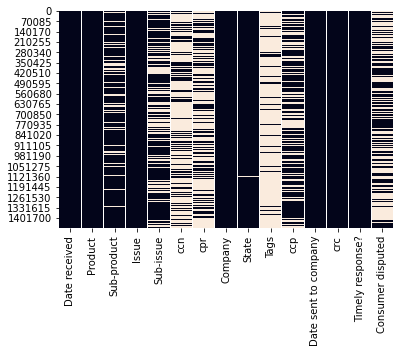

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [21]:
df["Sub-product"].fillna(value = 'Others', inplace = True)

df["Sub-issue"].fillna(value = 'Others', inplace = True)


In [23]:
df.ccn.fillna(value = 'NaN', inplace = True)

df.cpr.fillna(value = 'NaN', inplace = True)

df.Tags.fillna(value = 'Others', inplace = True)

df["Consumer disputed"].fillna(value = 'NaN', inplace = True)

In [24]:
#checking the NaN values
pd.set_option('display.max_rows',20)

df.isnull()


Date received  Product  ...  Timely response?  Consumer disputed
0                False    False  ...             False              False
1                False    False  ...             False              False
2                False    False  ...             False              False
3                False    False  ...             False              False
4                False    False  ...             False              False
...                ...      ...  ...               ...                ...
1471761          False    False  ...             False              False
1471762          False    False  ...             False              False
1471763          False    False  ...             False              False
1471764          False    False  ...             False              False
1471765          False    False  ...             False              False

[1471766 rows x 15 columns]

In [53]:
#Removed Duplicate Rows
df.dropna(how='any',inplace=True)

In [54]:
df.isnull().sum()

Date received           0
Product                 0
Sub-product             0
Issue                   0
Sub-issue               0
ccn                     0
cpr                     0
Company                 0
State                   0
Tags                    0
ccp                     0
Date sent to company    0
crc                     0
Timely response?        0
Consumer disputed       0
Total Time              0
dtype: int64

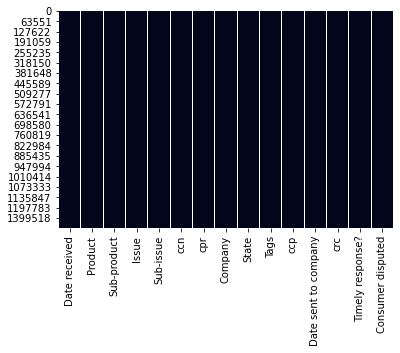

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.shape

(762829, 15)

In [ ]:
df.describe()

Date received   Product  ... Timely response? Consumer disputed
count         762829    762829  ...           762829            762829
unique          1970        13  ...                2                 2
top       01/19/2017  Mortgage  ...              Yes                No
freq            2058    225405  ...           741470            615426

[4 rows x 15 columns]

In [ ]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    322817
Mortgage                                                                        293191
Debt collection                                                                 275584
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Credit card or prepaid card                                                      65270
Student loan                                                                     55838
Checking or savings account                                                      55452
Consumer Loan                                                                    31604
Vehicle loan or lease                                                            15040
Money transfer, virtual currency, or money 

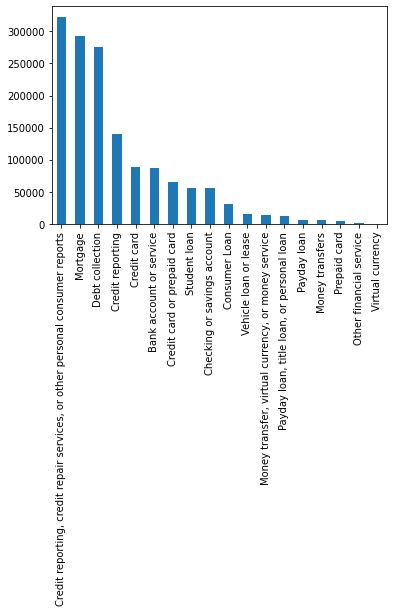

In [ ]:
df.Product.value_counts().plot(kind='bar')

In [ ]:
df[df.Product =='Student loan']

Date received       Product  ... Consumer disputed? Complaint ID
1          12/23/2019  Student loan  ...                NaN      3475943
23         05/03/2013  Student loan  ...                 No       398174
65         02/05/2016  Student loan  ...                 No      1775306
74         12/19/2017  Student loan  ...                NaN      2760008
114        03/28/2013  Student loan  ...                 No       368339
...               ...           ...  ...                ...          ...
1471663    05/16/2018  Student loan  ...                NaN      2908973
1471688    12/13/2017  Student loan  ...                NaN      2754274
1471724    04/26/2017  Student loan  ...                NaN      2466789
1471748    05/09/2019  Student loan  ...                NaN      3237184
1471765    11/13/2019  Student loan  ...                NaN      3437084

[55838 rows x 18 columns]

In [ ]:
pd.set_option('display.max_rows',None)


In [ ]:
df['Sub-product'].value_counts()

Credit reporting                              317046
Checking account                              100803
Other mortgage                                 86635
Conventional fixed mortgage                    70613
I do not know                                  56904
General-purpose credit card or charge card     50393
Other (i.e. phone, health club, etc.)          44544
Other debt                                     38694
Conventional home mortgage                     38264
FHA mortgage                                   33903
Credit card                                    28698
Credit card debt                               27488
Conventional adjustable mortgage (ARM)         25380
Federal student loan servicing                 25271
Non-federal student loan                       25164
Medical                                        21187
Medical debt                                   21108
Other bank product/service                     17825
Vehicle loan                                  

In [26]:
df['Issue'].value_counts()


Incorrect information on your report                                                198687
Loan modification,collection,foreclosure                                            112309
Incorrect information on credit report                                              102686
Loan servicing, payments, escrow account                                             77333
Problem with a credit reporting company's investigation into an existing problem     73335
Cont'd attempts collect debt not owed                                                60682
Attempts to collect debt not owed                                                    58234
Improper use of your report                                                          41348
Communication tactics                                                                38557
Account opening, closing, or management                                              37961
Managing an account                                                                  34895

In [52]:
#Group the dataset by Product

a= df.groupby("Product").Issue.value_counts()
a

Product                                                                       Issue                                                                           
Bank account or service                                                       Account opening, closing, or management                                              37961
                                                                              Deposits and withdrawals                                                             22851
                                                                              Problems caused by my funds being low                                                11845
                                                                              Making/receiving payments, sending money                                              7404
                                                                              Using a debit or ATM card                                                             6

In [28]:
df['Sub-issue'].value_counts()

Others                                                                                   555003
Information belongs to someone else                                                      100447
Their investigation did not fix an error on your report                                   53714
Account status                                                                            37057
Debt is not mine                                                                          36727
Account status incorrect                                                                  34612
Information is not mine                                                                   32384
Account information incorrect                                                             31241
Debt is not yours                                                                         30392
Debt was paid                                                                             28869
Credit inquiries on your report that you

In [29]:
response1 = df.groupby(['Product','Issue'])['Timely response?'].value_counts()
response1

Product                                                                       Issue                                                                             Timely response?
Bank account or service                                                       Account opening, closing, or management                                           Yes                  36928
                                                                                                                                                                No                    1033
                                                                              Deposits and withdrawals                                                          Yes                  22294
                                                                                                                                                                No                     557
                                                                           

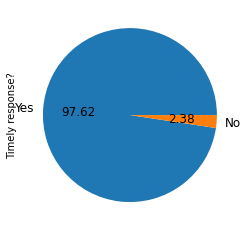

In [30]:
df['Timely response?'].value_counts().plot.pie(fontsize = 12, autopct = '%.2f')

In [ ]:
df['Company public response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            399111
Company believes it acted appropriately as authorized by contract or law                                                    70164
Company chooses not to provide a public response                                                                            52473
Company believes the complaint is the result of a misunderstanding                                                           6425
Company disputes the facts presented in the complaint                                                                        5793
Company believes complaint caused principally by actions of third party outside the control or direction of the company      4343
Company believes complaint is the result of an isolated error                                                                4232
Company believes complaint represents an opportunity for improvement to better serve consu

In [33]:
df['Company'].value_counts()

EQUIFAX, INC.                                                                               144853
Experian Information Solutions Inc.                                                         129127
TRANSUNION INTERMEDIATE HOLDINGS, INC.                                                      124533
BANK OF AMERICA, NATIONAL ASSOCIATION                                                        87526
WELLS FARGO & COMPANY                                                                        75672
JPMORGAN CHASE & CO.                                                                         65573
CITIBANK, N.A.                                                                               53712
CAPITAL ONE FINANCIAL CORPORATION                                                            40004
Navient Solutions, LLC.                                                                      31460
Ocwen Financial Corporation                                                                  28982
SYNCHRONY 

In [34]:
df.groupby(['Issue'])['Company'].value_counts()


Output hidden; open in https://colab.research.google.com to view.

In [36]:
df.groupby(['State'])['Issue'].value_counts()


State                                 Issue                                                                           
AA                                    Incorrect information on your report                                                    3
                                      Loan modification,collection,foreclosure                                                3
                                      Loan servicing, payments, escrow account                                                3
                                      Managing an account                                                                     3
                                      Trouble during payment process                                                          3
                                      Account opening, closing, or management                                                 2
                                      Attempts to collect debt not owed                                          

In [ ]:
df.groupby(['Issue'])['crc'].value_counts()


Issue                             crc                            
APR or interest rate              Closed with explanation            2898
                                  Closed with monetary relief        1313
                                  Closed with non-monetary relief     486
                                  Closed without relief               427
                                  Closed with relief                  342
                                                                     ... 
Wrong amount charged or received  Closed with explanation             456
                                  Closed with monetary relief         105
                                  Closed with non-monetary relief      18
                                  Closed                                3
                                  In progress                           3
Name: crc, Length: 865, dtype: int64

In [37]:
df.groupby(['crc'])['Company'].value_counts()


crc                              Company                                                                                 
Closed                           Ocwen Financial Corporation                                                                   1251
                                 SANTANDER BANK, NATIONAL ASSOCIATION                                                          1160
                                 BANK OF AMERICA, NATIONAL ASSOCIATION                                                         1070
                                 ERC                                                                                            663
                                 PNC Bank N.A.                                                                                  646
                                 JPMORGAN CHASE & CO.                                                                           628
                                 Specialized Loan Servicing LLC                       

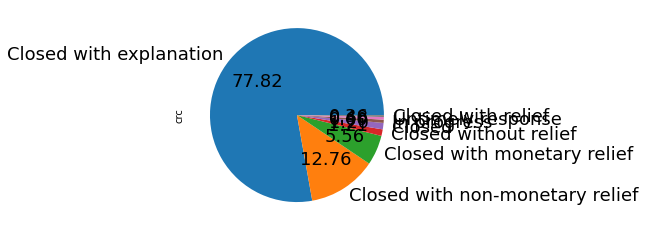

In [38]:
df.crc.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

In [39]:
pd.DataFrame(df.crc.value_counts())

crc
Closed with explanation          1145354
Closed with non-monetary relief   187868
Closed with monetary relief        81860
Closed without relief              17868
Closed                             17611
In progress                         8836
Untimely response                   7064
Closed with relief                  5304

In [40]:
df['State'].value_counts()

CA                                      199148
FL                                      150693
TX                                      124985
NY                                      100533
GA                                       78458
IL                                       56426
NJ                                       53688
PA                                       50340
NC                                       45388
OH                                       43494
VA                                       41649
MD                                       40484
MI                                       34102
AZ                                       30622
WA                                       27129
MA                                       25579
TN                                       24249
CO                                       22917
SC                                       22641
MO                                       20971
NV                                       19236
LA           

In [41]:
df.groupby(['State'])['Issue'].value_counts()


State                                 Issue                                                                           
AA                                    Incorrect information on your report                                                    3
                                      Loan modification,collection,foreclosure                                                3
                                      Loan servicing, payments, escrow account                                                3
                                      Managing an account                                                                     3
                                      Trouble during payment process                                                          3
                                      Account opening, closing, or management                                                 2
                                      Attempts to collect debt not owed                                          

In [42]:
df.dtypes

Date received           object
Product                 object
Sub-product             object
Issue                   object
Sub-issue               object
ccn                     object
cpr                     object
Company                 object
State                   object
Tags                    object
ccp                     object
Date sent to company    object
crc                     object
Timely response?        object
Consumer disputed       object
dtype: object

In [43]:
#Cleaned the Date received,Date sent to company columns and converted it into the datetime64 data type
df['Date received']=pd.to_datetime(df['Date received'])

df['Date sent to company']=pd.to_datetime(df['Date sent to company'])

In [44]:
df.dtypes

Date received           datetime64[ns]
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
ccn                             object
cpr                             object
Company                         object
State                           object
Tags                            object
ccp                             object
Date sent to company    datetime64[ns]
crc                             object
Timely response?                object
Consumer disputed               object
dtype: object

In [45]:
df['Total Time'] = df['Date sent to company'] - df['Date received']
df.head(5)

Date received  ... Total Time
0    2015-08-09  ...     0 days
1    2019-12-23  ...     0 days
2    2019-01-29  ...     1 days
3    2015-08-19  ...     0 days
4    2016-03-04  ...     0 days

[5 rows x 16 columns]

In [46]:
df.year = df['Date received'].dt.year
df.year.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



2019    274770
2018    257333
2017    242967
2016    191470
2015    168475
2014    153044
2013    108217
2012     72373
2011      2536
2020       581
Name: Date received, dtype: int64

In [47]:
df.year = df['Date sent to company'].dt.year
df.year.value_counts()

2019    275751
2018    257104
2017    243433
2016    191380
2015    168663
2014    153454
2013    107406
2012     71603
2011      2335
2020       637
Name: Date sent to company, dtype: int64

In [48]:
c = df.groupby(['Date sent to company'])['Product'].value_counts()
c

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
d = df.groupby(['Date sent to company','Product'])['Issue'].value_counts()
d

Date sent to company  Product                                    Issue                                              
2011-12-01            Credit card                                Billing disputes                                       11
                                                                 Credit determination                                    7
                                                                 Credit reporting                                        7
                                                                 Other                                                   5
                                                                 Other fee                                               5
                                                                                                                        ..
2020-01-07            Mortgage                                   Closing on a mortgage                                   1
                      

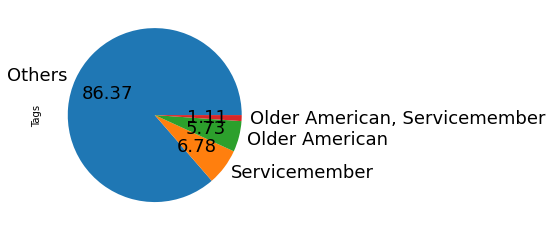

In [49]:
df.Tags.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

In [50]:
e = df.groupby(['Product','Issue'])['Consumer disputed'].value_counts()
e

Product                                                                       Issue                                                                             Consumer disputed
Bank account or service                                                       Account opening, closing, or management                                           No                    30509
                                                                                                                                                                Yes                    7452
                                                                              Deposits and withdrawals                                                          No                    18671
                                                                                                                                                                Yes                    4180
                                                                      

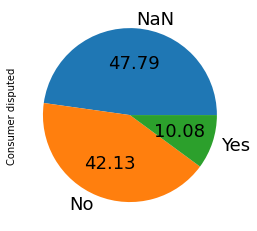

In [51]:
df['Consumer disputed'].value_counts().plot.pie(fontsize = 18, autopct = '%.2f')